###  Problem 3
The Hilbert matrix is a classical example of an ill-conditioned matrix. For an $n\times n$-matrix it is
defined as the matrix with $ij$-element
$
\frac{1}{i+j-1}
$

**(a)**
For $n=2,\ldots,13$ find the $n\times n$ Hilbert matrix $H_n$ and compute the condition number $K_2(H_n)$ in Python. You can either write a function yourself for setting up $H_n$, or you can use scipy.linalg.hilbert().
To compute the condition number you can use numpy.linalg.cond. Display/plot the result in a way that best shows the growth rate of the condition number as a function of the dimension $n$.


#### Solution 3a

Here are the conditioning numbers plotted as functions of n.


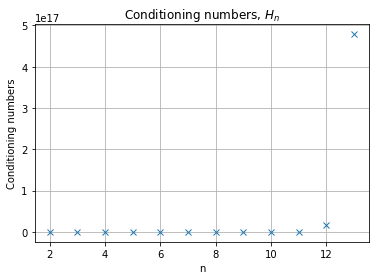

Here is the growth of the conditioning numbers as a function of n, thereby the derivative of the previous plot.


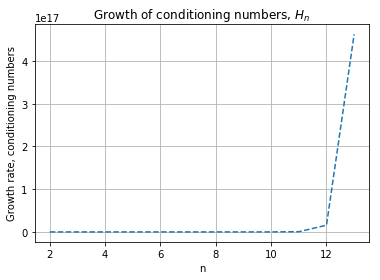

In order to more easily see the change in the growth of the conditioning numbers, I applied a logarithmic scale, 
which is shown below.


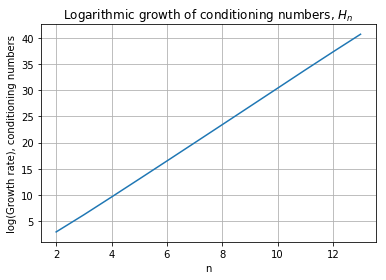

In [60]:
import numpy as np
import scipy as sc
from scipy import linalg
import matplotlib.pyplot as plt

n_list=(np.linspace(2,13,12)) #making a list for the n-values

def hil_mat(n):
    return sc.linalg.hilbert(int(n))

def cond_num(M):
    return np.linalg.cond(M)


#making a list for the conditioning numbers    
cond_list=[]
for n in n_list:
    cond_list.append(cond_num(hil_mat(n)))


#plotting the conditioning numbers against the n-values
print("""Here are the conditioning numbers plotted as functions of n.""")
plt.plot(n_list,cond_list,"x")
plt.title("Conditioning numbers, $H_n$")
plt.xlabel("n")
plt.ylabel("Conditioning numbers")
plt.grid()
plt.show()

#however, we wish to show the growth rate of the conditioning number as a function to the dimension
#and thereby the derivative

slope_list=[]
for i in range(len(cond_list)):
    if i==0:
        slope_list.append(cond_list[i])
    else:
        slope_list.append(cond_list[i]-cond_list[i-1])

print("""Here is the growth of the conditioning numbers as a function of n, thereby the derivative of the previous plot.""")
plt.plot(n_list,slope_list,"--")
plt.title("Growth of conditioning numbers, $H_n$")
plt.xlabel("n")
plt.ylabel("Growth rate, conditioning numbers")
plt.grid()
plt.show()

#as these graphs show little change, i'll show it logarithmically
print("""In order to more easily see the change in the growth of the conditioning numbers, I applied a logarithmic scale, 
which is shown below.""")
plt.plot(n_list,np.log(slope_list))
plt.title("Logarithmic growth of conditioning numbers, $H_n$")
plt.xlabel("n")
plt.ylabel("log(Growth rate), conditioning numbers")
plt.grid()
plt.show()

#### Problem 3(b)


**(b)** Illustrate the meaning of condition numbers as follows: For a range of small perturbations $\delta H_n$ and
$\delta b$, solve the problems $(H_n+\delta H_n)(x+\delta x) = b+\delta b$ where $b=[1,\ldots,1]^T$ (the $n$-vector of ones). In each case, compare to the solution of $H_n x = b$ and calculate

$$
     \frac{\frac{\|\delta x\|}{\|x\|}}{\frac{\|\delta H_n\|}{\|H_n\|}+\frac{\|\delta b\|}{\|b\|}}.
$$

One way of generating random arrays (matrices and vectors) is to use numpy.random.rand(j,k). This generates a $j \times k$ array, where each entry is a random number in the range $[0,1).$ Remember however that the smallest entry in $H_n$ is $\tfrac{1}{2n+1}$ so yopu have to make sure that the matrix entries in $\delta H_n$ are small enough to consider $\delta H_n$ a small perturbation.


#### Solution 3(b)

In order to solve the linear system of equations, I implemented the CG-algorithm (see code). 
This algorithm was used in both the case of (1)Ax=b, and (2)(A+𝛿A)(x+𝛿x)=(b+𝛿b). 
Here you see the variations between the solutions, where the blue dots denote the solutions for (1) whilst the red crosses
denote the solutions for (2). As one can see in the graph, the solutions are almost identical for low n's. 
In the upper range of n's, the solution for (1) varies from solutions for (2).


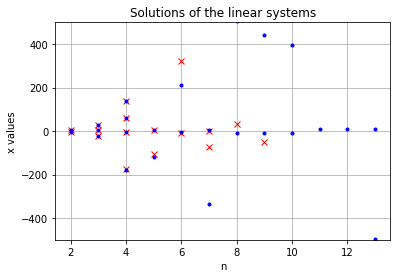

This is a graph of the average pertubation of x as a function of n. As shown, it has a quite steady growth until
the steep rise at around n=12.


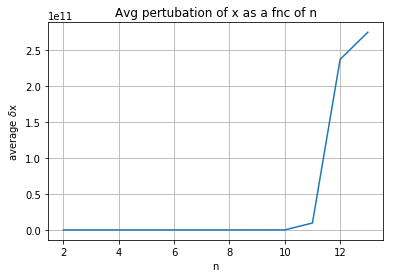

Below is the graph of the condition number as specified in problem 3b, plotted against n.


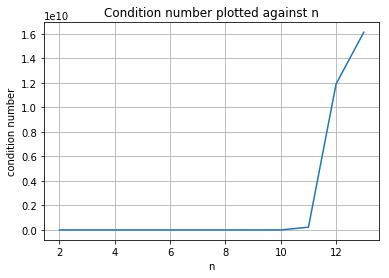

Next is the log of the condition number plotted against n, as the log of the condition number is almost linear.


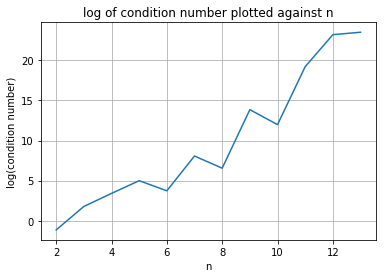

The graph of the condition number and the graph of 𝛿x, both as functions of n, looked quite similar but were of
very different order, so that it was difficult to see the correlation on small graphs. I therefore plotted the logarithms
of the two against each other. As shown in the graph below, they behave quite similarly and so one can see that the 
condition number is affected by the small pertubations 𝛿x.


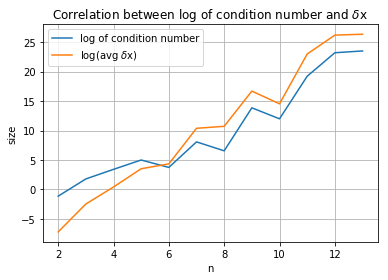

In [68]:
from numpy import random

#a function that creates the b-vector
def b_vec(n):
    return np.ones(n)
#we already have the function hil_mat that makes hilbert matrices

def x_start_val(n):
    return np.zeros(n)

def cg_method(A,b,x,i_max,err):
    i=0
    r=b-A@x
    d=r
    delta_new=np.transpose(r)@r
    delta_null=delta_new
    while (i<i_max) and (delta_new>(err**2)*delta_null):
        q=A@d
        alfa=delta_new/(np.transpose(d)@q)
        x=x+(alfa*d)
        if (i%50==0):
            r=b-A@x
        else:
            r=r-alfa*q
        delta_old=delta_new
        delta_new=np.transpose(r)@r
        beta = delta_new/delta_old
        d = r + beta*d
        i=i+1
    return x

    
#so here we have the values of H_nx=b
#next we create small pertubations
#pertubations of hilbert matrix is scaled to smallest value
def delta_hil(n):
    return np.random.rand(n,n)*1e-22*(1/(2*n+1)**3)

#pertubations of b, however, are to scale as b is [1,1,..,1] vec
def delta_b(n):
    return np.random.rand(n)*0.001

def the_cond_num(x,delta_x,hil,delta_hil,b,delta_b):
    x_part=np.linalg.norm(delta_x)/np.linalg.norm(x)
    h_part=np.linalg.norm(delta_hil)/np.linalg.norm(hil)
    b_part=np.linalg.norm(delta_b)/np.linalg.norm(b)
    return abs(x_part)/(abs(h_part)+abs(b_part))



print("""In order to solve the linear system of equations, I implemented the CG-algorithm (see code). 
This algorithm was used in both the case of (1)Ax=b, and (2)(A+𝛿A)(x+𝛿x)=(b+𝛿b). 
Here you see the variations between the solutions, where the blue dots denote the solutions for (1) whilst the red crosses
denote the solutions for (2). As one can see in the graph, the solutions are almost identical for low n's. 
In the upper range of n's, the solution for (1) varies from solutions for (2).""")
for n in range(2,14):
    new_hil=hil_mat(n)+delta_hil(n) #this is hilbert+deltah_n
    new_b=b_vec(n)+delta_b(n) #this is b+deltab
    hil_delta=cg_method(new_hil,new_b,x_start_val(n),300,10e-6)#this is solved for x
    hil_now=cg_method(hil_mat(n),b_vec(n),x_start_val(n),300,10e-6)
    for i in range(n):
        plt.plot(n,hil_delta[i],"rx")
        plt.plot(n,hil_now[i],"b.")
plt.title("Solutions of the linear systems")
plt.xlabel("n")
plt.ylabel("x values")
plt.ylim(-500,500)
plt.grid()
plt.show()


avg_list=[]
cond_num_list=[]
for n in range(2,14):
    thesum=0
    d_h=delta_hil(n)
    d_b=delta_b(n)
    new_hil=hil_mat(n)+d_h#this is hilbert+deltah_n
    new_b=b_vec(n)+d_b #this is b+deltab
    x_plus_delta=cg_method(new_hil,new_b,x_start_val(n),300,10e-6)#this is solved for x
    the_x=cg_method(hil_mat(n),b_vec(n),x_start_val(n),300,10e-6)
    d_x=the_x-x_plus_delta
    for i in range(n):
        thesum+=abs(x_plus_delta[i]-the_x[i])
    cond_num_list.append(the_cond_num(the_x,d_x,b_vec(n),d_b,hil_mat(n),d_h))
    avg_list.append(thesum/n)
    endvals=[1,n+1]
    condvals=[the_cond_num(the_x,d_x,b_vec(n),d_b,hil_mat(n),d_h),the_cond_num(the_x,d_x,b_vec(n),d_b,hil_mat(n),d_h)]
    
print("""This is a graph of the average pertubation of x as a function of n. As shown, it has a quite steady growth until
the steep rise at around n=12.""")
plt.plot(n_list,avg_list)
plt.title("Avg pertubation of x as a fnc of n")
plt.xlabel("n")
plt.ylabel("average $\delta$x")
plt.grid()
plt.show()
plt.plot(n_list,cond_num_list)
print("""Below is the graph of the condition number as specified in problem 3b, plotted against n.""")
plt.title("Condition number plotted against n")
plt.xlabel("n")
plt.ylabel("condition number")
plt.grid()
plt.show()
plt.plot(n_list,np.log(cond_num_list))
print("""Next is the log of the condition number plotted against n, as the log of the condition number is almost linear.""")
plt.title("log of condition number plotted against n")
plt.xlabel("n")
plt.ylabel("log(condition number)")
plt.grid()
plt.show()
print("""The graph of the condition number and the graph of 𝛿x, both as functions of n, looked quite similar but were of
very different order, so that it was difficult to see the correlation on small graphs. I therefore plotted the logarithms
of the two against each other. As shown in the graph below, they behave quite similarly and so one can see that the 
condition number is affected by the small pertubations 𝛿x.""")
plt.plot(n_list,np.log(cond_num_list),label="log of condition number")
plt.plot(n_list,np.log(avg_list),label="log(avg $\delta$x)")
plt.title("Correlation between log of condition number and $\delta$x")
plt.xlabel("n")
plt.ylabel("size")
plt.grid()
plt.legend()
plt.show()


